# 2-D Linear and Polynomial Regressions

## All the usual imports, +

In [14]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib qt

## Create new 2-D data (2 features) - 3 plateaus

In [2]:
vals_dict = {'d1':0, 'd2':1, 'd3':2}  #Generate three clouds of data
num_d1s = num_d2s = num_d3s = 50
# assume 2 features
d1_data = np.random.normal(loc=(1.0,1.0), scale=0.5, size=(num_d1s,2))
# WHAT ARE loc AND scale HERE?
d2_data = np.random.normal(loc=(1.0,3.0), scale=0.5, size=(num_d2s,2))
d3_data = np.random.normal(loc=(3.0,1.0), scale=0.5, size=(num_d3s,2))
# print(num_d1s)
d1_vals = vals_dict['d1']*np.ones((num_d1s,1))
d2_vals = vals_dict['d2']*np.ones((num_d2s,1))
d3_vals = vals_dict['d3']*np.ones((num_d3s,1))
# print(d1_data)

## Convert data into usual form for ML

In [16]:
X = np.concatenate((d1_data,d2_data,d3_data),axis = 0)#slaps the new arrays onto the thing.
print('X shape ',X.shape)
# NEED TO AUGMENT WITH ONES!
x0_s = np.ones((len(X),1))
X_aug = np.concatenate((x0_s,X),axis = 1)
print('aug X shape ',X_aug.shape)

y = np.concatenate((d1_vals,d2_vals,d3_vals),axis = 0)
print('y shape ',y.shape)

X shape  (150, 2)
aug X shape  (150, 3)
y shape  (150, 1)


## Plot Data

In [17]:
#If you want this to show up as a 3d interactive plot, than you need to rerun the top cell, and then this cell.
fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],y,c = 'r')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('point value')

Text(0.5, 0, 'point value')

## Direct Parameter Calculation for Linear Model

In [18]:
# now fit model
theta_best = np.linalg.inv(X_aug.T.dot(X_aug)).dot(X_aug.T).dot(y)
print('theta shape ',theta_best.shape)
print('theta values ',theta_best)

theta shape  (3, 1)
theta values  [[-0.7283084 ]
 [ 0.70061415]
 [ 0.30563789]]


## Predict result for new data point

In [27]:
# make up a new data point that we want the val for
X_pt = np.array([[1.1,1.2]]) # x0 = 1.3, x1 = 1.7
X_pt_aug = np.c_[np.ones((1, 1)), X_pt]  # add x0 = 1 to each instance

# apply model
y_predict = X_pt_aug.dot(theta_best)
print(y_predict)
# WHAT DID WE WANT?

[[0.40913263]]


## Plot our model surface

In [20]:
# need way to generate grid of points to evaluate surface at
# solution: meshgrid()
num_x1s, num_x2s = (20,20)
x1 = np.linspace(0, 4, num_x1s)
x2 = np.linspace(0, 4, num_x2s)
x1_mg, x2_mg = np.meshgrid(x1, x2)
print('x1_mg shape ',x1_mg.shape)
print('x2_mg shape',x2_mg.shape)

# reshape into column vectors
x1_mg_col = x1_mg.reshape(-1,1)
x2_mg_col = x2_mg.reshape(-1,1)
print('x1_mg_col shape ',x1_mg_col.shape)

z_mg_col = np.zeros((x1_mg_col.shape))
for n in range(len(z_mg_col)):
    # need to augment with one before using to predict
    X_pt_aug = np.array([[1,x1_mg_col[n],x2_mg_col[n]]]) 
    y_predict = X_pt_aug.dot(theta_best)

    z_mg_col[n] = y_predict

x1_mg shape  (20, 20)
x2_mg shape (20, 20)
x1_mg_col shape  (400, 1)


In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1_mg_col,x2_mg_col,z_mg_col,marker = '.')

ax.scatter(X[:,0],X[:,1],y,c = 'r')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('point value')
# WHAT WOULD WE SAY ABOUT THE BIAS/VARIANCE FOR THIS MODEL?

Text(0.5, 0, 'point value')

## Making Model more Flexible (Polynomial Regression)

In [9]:
# add in higher degree columns
print(X_aug.shape)
x1_2 = X_aug[:,1]**2
x1_2 = x1_2.reshape((-1,1))
x2_2 = X_aug[:,2]**2
x2_2 = x2_2.reshape((-1,1))
print(x1_2.shape)
print(X_aug.shape)
X_aug_2 = np.concatenate((X_aug,x1_2,x2_2),axis = 1)
print(X_aug_2.shape)


(150, 3)
(150, 1)
(150, 3)
(150, 5)


In [10]:
# now fit model with the functino we learned in class
theta_best = np.linalg.inv(X_aug_2.T.dot(X_aug_2)).dot(X_aug_2.T).dot(y)
print('theta shape ',theta_best.shape)
print('theta values ',theta_best)

theta shape  (5, 1)
theta values  [[-0.33756646]
 [ 0.38981344]
 [ 0.05233396]
 [ 0.07970532]
 [ 0.06610397]]


In [11]:
# replot
num_x1s, num_x2s = (20,20)
x1 = np.linspace(0, 4, num_x1s)
x2 = np.linspace(0, 4, num_x2s)
x1_mg, x2_mg = np.meshgrid(x1, x2)
print('x1_mg shape ',x1_mg.shape)
print('x2_mg shape',x2_mg.shape)

# reshape into column vectors
x1_mg_col = x1_mg.reshape(-1,1)
x2_mg_col = x2_mg.reshape(-1,1)
print('x1_mg_col shape ',x1_mg_col.shape)

z_mg_col = np.zeros((x1_mg_col.shape))
for n in range(len(z_mg_col)):
    # need to augment with one before using to predict
    X_pt_aug_2 = np.array([1,x1_mg_col[n],x2_mg_col[n],x1_mg_col[n]**2,x2_mg_col[n]**2]) 
    y_predict = X_pt_aug_2.dot(theta_best)

    z_mg_col[n] = y_predict
 

x1_mg shape  (20, 20)
x2_mg shape (20, 20)
x1_mg_col shape  (400, 1)


Text(0.5, 0, 'point value')

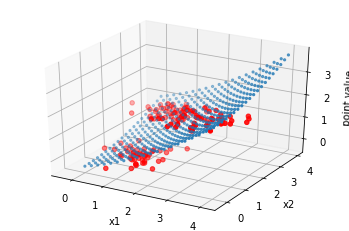

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1_mg_col,x2_mg_col,z_mg_col,marker = '.')

ax.scatter(X[:,0],X[:,1],y,c = 'r')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('point value')

In [13]:
# TRY TO EXTEND TO HIGHER TERMS